<a href="https://colab.research.google.com/github/oshanmay11/my_projects/blob/main/CatsVsDogsAugmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub
path = kagglehub.dataset_download("shaunthesheep/microsoft-catsvsdogs-dataset")

100%|██████████| 788M/788M [00:06<00:00, 130MB/s]

Extracting files...


First, let's look at the structure of the downloaded dataset to see where the images are located. We can use the `os` module to list the contents of the directories.

In [10]:
import os

# List contents of the PetImages directory
pet_images_path = os.path.join(path, 'PetImages')
print(f"Contents of {pet_images_path}:")
for folder in os.listdir(pet_images_path):
    print(f"  - {folder}")

# List a few images from the Dog and Cat subdirectories
print(f"\nFirst 5 dog images in {os.path.join(pet_images_path, 'Dog')}:")
print(os.listdir(os.path.join(pet_images_path, 'Dog'))[:5])

print(f"\nFirst 5 cat images in {os.path.join(pet_images_path, 'Cat')}:")
print(os.listdir(os.path.join(pet_images_path, 'Cat'))[:5])

Contents of /root/.cache/kagglehub/datasets/shaunthesheep/microsoft-catsvsdogs-dataset/versions/1/PetImages:
  - Cat
  - Dog

First 5 dog images in /root/.cache/kagglehub/datasets/shaunthesheep/microsoft-catsvsdogs-dataset/versions/1/PetImages/Dog:
['8344.jpg', '4800.jpg', '605.jpg', '11479.jpg', '6520.jpg']

First 5 cat images in /root/.cache/kagglehub/datasets/shaunthesheep/microsoft-catsvsdogs-dataset/versions/1/PetImages/Cat:
['8344.jpg', '4800.jpg', '605.jpg', '11479.jpg', '6520.jpg']


Now that we know the structure, we can load another image, for example, a cat image.

Loaded image from: /root/.cache/kagglehub/datasets/shaunthesheep/microsoft-catsvsdogs-dataset/versions/1/PetImages/Cat/1.jpg


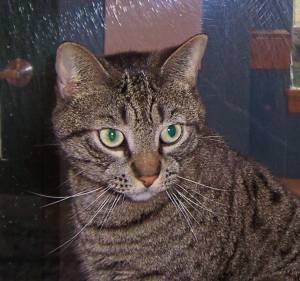

In [17]:
from tensorflow.keras.preprocessing.image import load_img
from IPython.display import display

# Load a cat image
cat_image_path = os.path.join(pet_images_path, 'Cat', '1.jpg')
cat_img = load_img(cat_image_path)

print(f"Loaded image from: {cat_image_path}")
display(cat_img)


In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator,array_to_img, img_to_array, load_img
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
img = load_img(cat_image_path)  # this is a PIL image

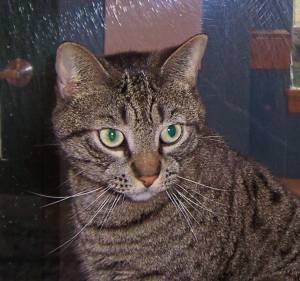

In [16]:
img

In [24]:

x = img_to_array(img)
x = x.reshape((1,) + x.shape)
x

array([[[[ 36.,  41.,  37.],
         [ 37.,  42.,  38.],
         [ 38.,  42.,  41.],
         ...,
         [200., 198., 160.],
         [200., 198., 160.],
         [203., 201., 162.]],

        [[ 38.,  43.,  39.],
         [ 39.,  44.,  40.],
         [ 39.,  43.,  42.],
         ...,
         [205., 202., 167.],
         [203., 201., 163.],
         [204., 202., 163.]],

        [[ 41.,  46.,  42.],
         [ 41.,  46.,  42.],
         [ 41.,  45.,  44.],
         ...,
         [203., 200., 165.],
         [200., 196., 159.],
         [198., 194., 157.]],

        ...,

        [[ 33.,  31.,  32.],
         [ 30.,  28.,  29.],
         [ 26.,  24.,  25.],
         ...,
         [ 41.,  28.,  20.],
         [ 35.,  25.,  16.],
         [ 61.,  51.,  42.]],

        [[ 34.,  32.,  33.],
         [ 32.,  30.,  31.],
         [ 27.,  25.,  26.],
         ...,
         [ 44.,  31.,  23.],
         [ 35.,  25.,  16.],
         [ 65.,  55.,  46.]],

        [[ 30.,  28.,  29.],
       

In [26]:
import os

i = 0
# Create the directory if it doesn't exist
output_dir = 'preview'
os.makedirs(output_dir, exist_ok=True)

for batch in datagen.flow(x, batch_size=1,
                          save_to_dir=output_dir, save_prefix='cat', save_format='jpeg'):
    i += 1
    if i > 20:
        break